Loading libraries and ensuring availability of hardware resources.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt

from layers import SeluConv3D, SeluDense

import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

Inspection of the datasets

In [2]:
from data import tfrecord_labeled_dataset, tfrecord_dataset, train_test_split, kfolds
from config import (
    CT_0_TFRECORD,
    CT_1_TFRECORD,
    CT_2_TFRECORD,
    CT_3_TFRECORD,
    CT_4_TFRECORD,
    COVID_NEG_TFRECORD,
    COVID_POS_TFRECORD,
    SCAN_SHAPE,
    LIDC_NUM_NODULES_TFRECORD,
)

data_pretraining, data_pretraining_test = train_test_split(tfrecord_labeled_dataset(LIDC_NUM_NODULES_TFRECORD))
data_covid_neg, data_covid_neg_test   = train_test_split(tfrecord_dataset(COVID_NEG_TFRECORD))
data_covid_pos, data_covid_pos_test   = train_test_split(tfrecord_dataset(COVID_POS_TFRECORD))

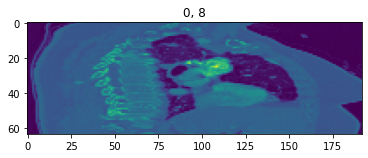

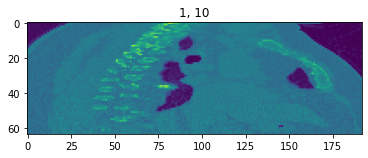

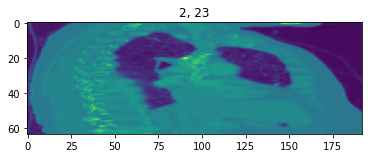

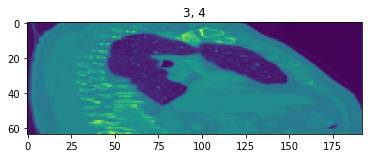

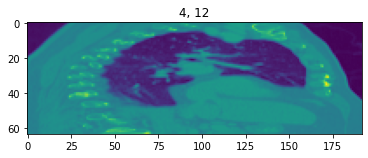

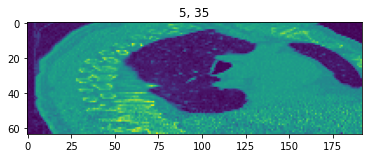

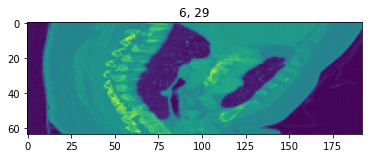

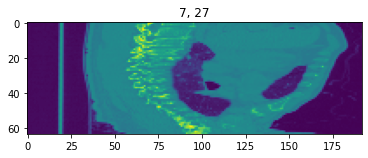

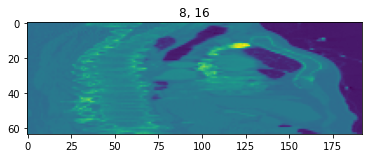

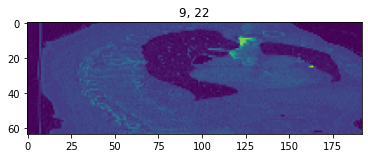

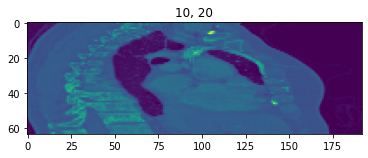

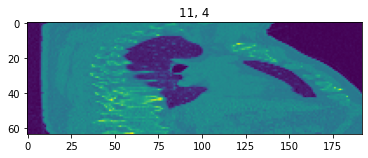

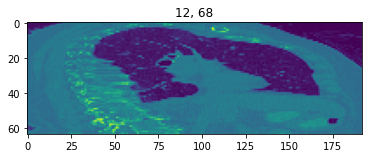

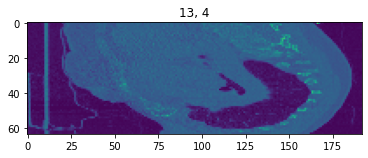

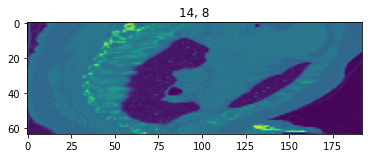

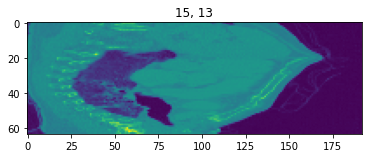

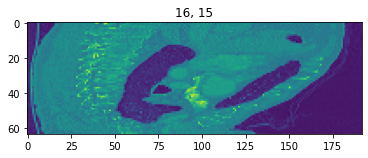

In [3]:
all_labels = [label for _, label in data_pretraining.as_numpy_iterator()]
for iElement, (element, label) in enumerate(data_pretraining.as_numpy_iterator()):
    plt.imshow (element[:,::-1,100,0])
    plt.title ( "%d, %d" % (iElement, int(label)) )
    plt.show()
    if iElement > 15: break

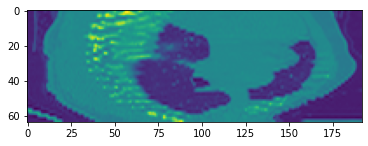

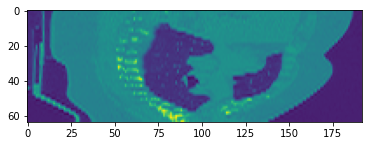

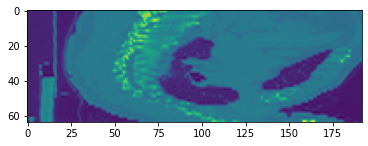

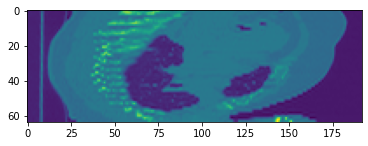

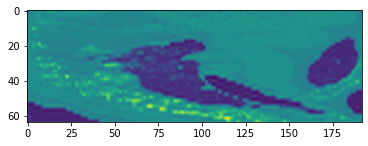

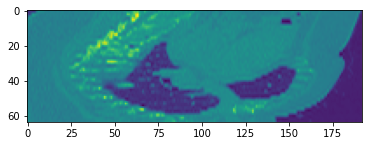

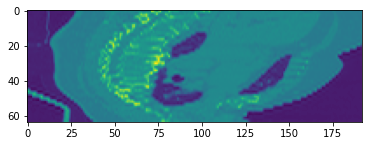

In [4]:
for iElement, element in enumerate(data_covid_pos.as_numpy_iterator()):
    plt.imshow (element[:,:,100,0])
    plt.show()
    if iElement > 5: break

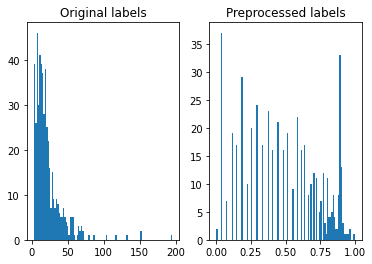

In [5]:
labels = [label for _, label in data_pretraining.as_numpy_iterator()]
from sklearn.preprocessing import QuantileTransformer
label_transformer = QuantileTransformer(n_quantiles=10)
label_transformer.fit (np.array(labels).astype(np.float32).reshape(-1,1))

plt.subplot(121)
plt.hist (np.array(labels).reshape(-1), bins = 100)
plt.title ( "Original labels" )
plt.subplot(122)
plt.hist (np.array(label_transformer.transform(labels)), bins = 100)
plt.title ( "Preprocessed labels" )
plt.show()

In [6]:
class LightnessWindowLayer (tf.keras.layers.Layer):
    def __init__(self, n_windows = 32, alpha = 500., name = None):
        super(LightnessWindowLayer, self).__init__(name=name or "LightnessWindowLayer")
        self.n_windows = n_windows
        self.alpha = alpha 
        
    def build(self, input_shape):
        self.scale = self.add_weight(
            shape =(self.n_windows,),
            initializer="random_uniform",
            trainable=True,
        )

        self.bias = self.add_weight(
            shape =(self.n_windows,),
            initializer="random_uniform",
            trainable=True,
        )
    
        
    def call(self, inputs):
        return tf.nn.sigmoid ( tf.tensordot (inputs, self.alpha * self.scale, axes=0) - self.alpha*self.scale*self.bias ) 

In [7]:
common_model = tf.keras.Sequential([
        #LightnessWindowLayer(32),
        SeluConv3D(filters=32, kernel_size=3, name="selu_conv3d_1"),
        tf.keras.layers.MaxPool3D(2, name="maxpool3d_1"),
        SeluConv3D(filters=32, kernel_size=3, name="selu_conv3d_2"),
        tf.keras.layers.MaxPool3D(2, name="maxpool3d_2"),
        SeluConv3D(filters=32, kernel_size=3, name="selu_conv3d_3"),
        tf.keras.layers.MaxPool3D(2, name="maxpool3d_3"),
        SeluConv3D(filters=32, kernel_size=3, name="selu_conv3d_4"),
        tf.keras.layers.MaxPool3D(2, name="maxpool3d_4"),
    ],
    name="common_model",
)

regression_model = tf.keras.Sequential ([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'linear')
])

Chunk 0/200: 100%|##########| 10/10 [04:43<00:00, 28.32s/it]


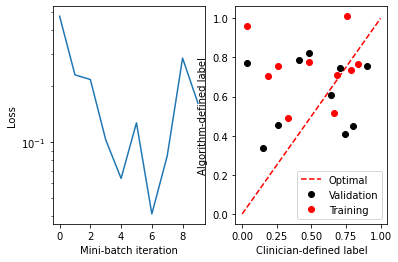

Chunk 1/200: 100%|##########| 10/10 [04:44<00:00, 28.43s/it]


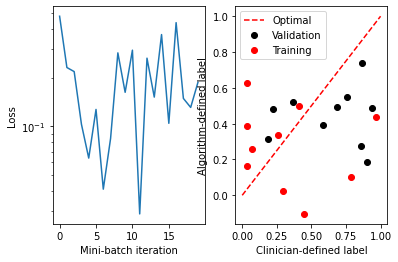

Chunk 2/200: 100%|##########| 10/10 [04:49<00:00, 28.94s/it]


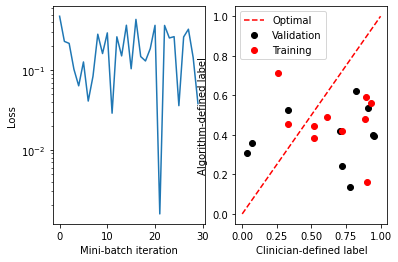

Chunk 3/200: 100%|##########| 10/10 [04:39<00:00, 27.91s/it]


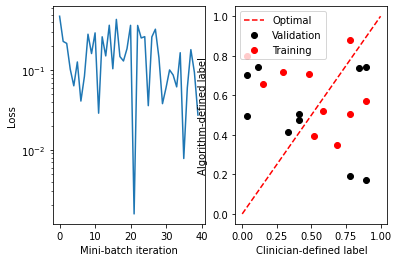

Chunk 4/200: 100%|##########| 10/10 [04:46<00:00, 28.63s/it]


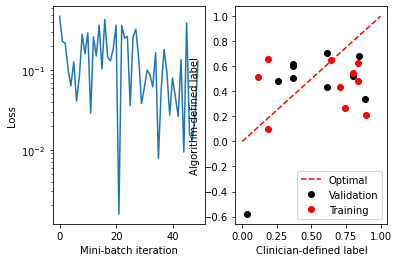

Chunk 5/200: 100%|##########| 10/10 [04:43<00:00, 28.38s/it]


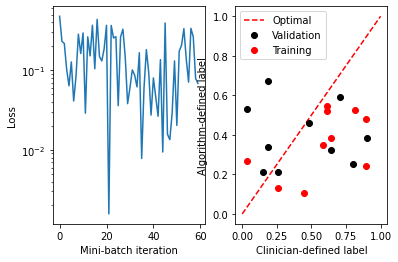

Chunk 6/200: 100%|##########| 10/10 [04:43<00:00, 28.31s/it]


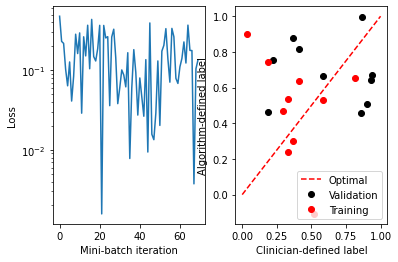

Chunk 7/200: 100%|##########| 10/10 [04:43<00:00, 28.39s/it]


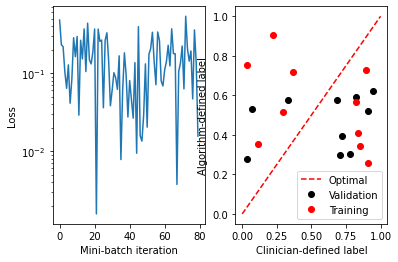

Chunk 8/200: 100%|##########| 10/10 [04:43<00:00, 28.36s/it]


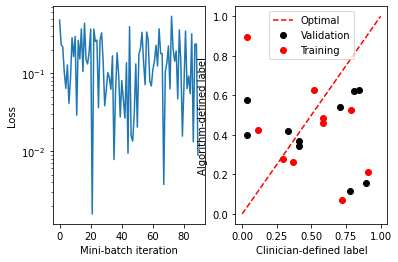

Chunk 9/200: 100%|##########| 10/10 [04:42<00:00, 28.28s/it]


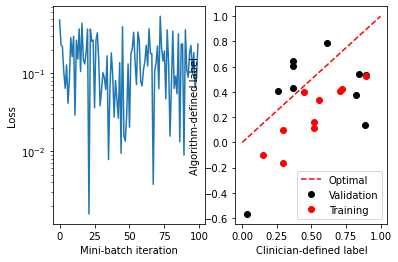

Chunk 10/200: 100%|##########| 10/10 [04:42<00:00, 28.29s/it]


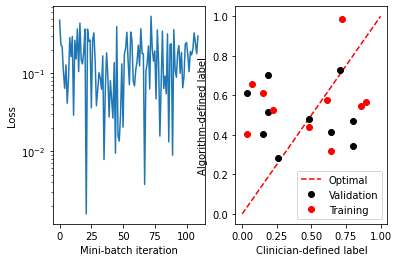

Chunk 11/200: 100%|##########| 10/10 [04:49<00:00, 28.93s/it]


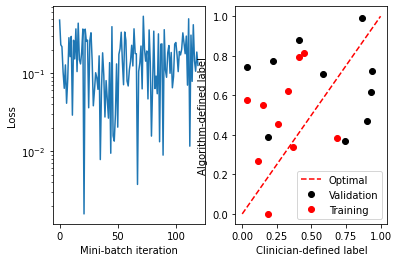

Chunk 12/200: 100%|##########| 10/10 [04:50<00:00, 29.01s/it]


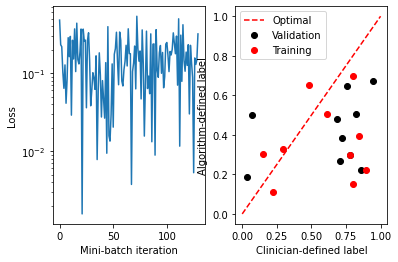

Chunk 13/200: 100%|##########| 10/10 [04:42<00:00, 28.21s/it]


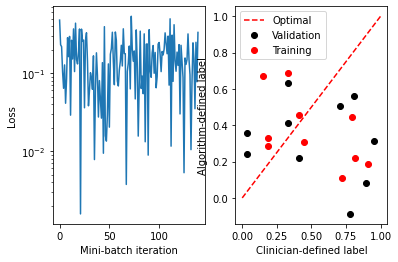

Chunk 14/200: 100%|##########| 10/10 [04:43<00:00, 28.33s/it]


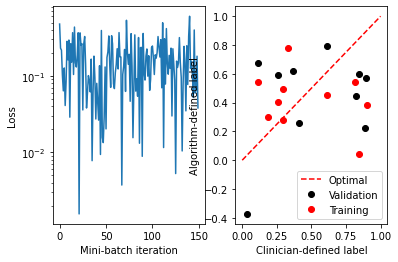

Chunk 15/200: 100%|##########| 10/10 [04:40<00:00, 28.06s/it]


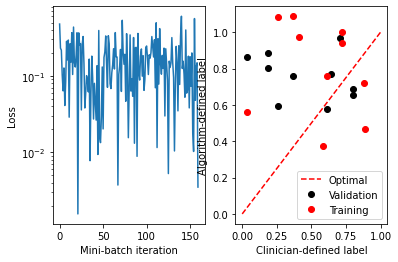

Chunk 16/200: 100%|##########| 10/10 [04:44<00:00, 28.45s/it]


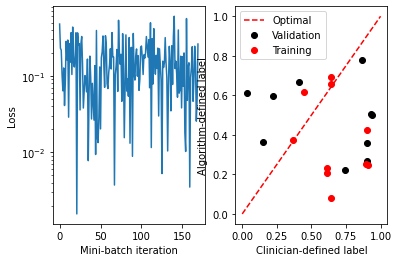

Chunk 17/200: 100%|##########| 10/10 [04:40<00:00, 28.07s/it]


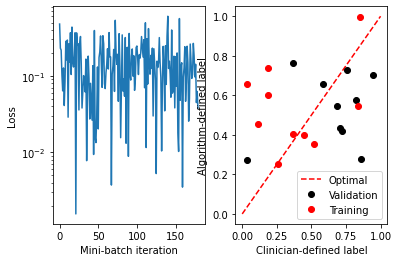

Chunk 18/200: 100%|##########| 10/10 [04:39<00:00, 27.91s/it]


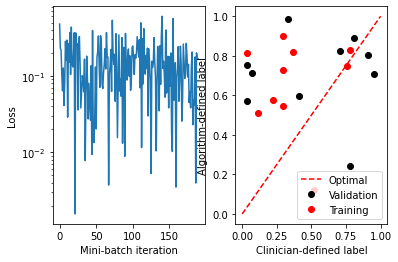

Chunk 19/200: 100%|##########| 10/10 [04:36<00:00, 27.69s/it]


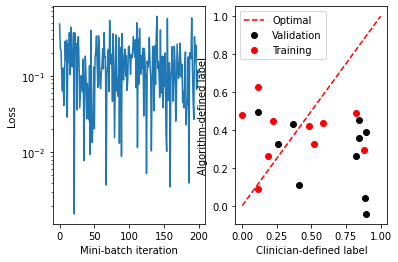

Chunk 20/200: 100%|##########| 10/10 [04:43<00:00, 28.32s/it]


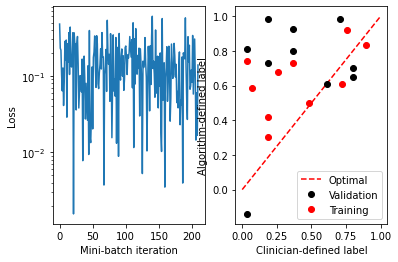

Chunk 21/200: 100%|##########| 10/10 [04:41<00:00, 28.19s/it]


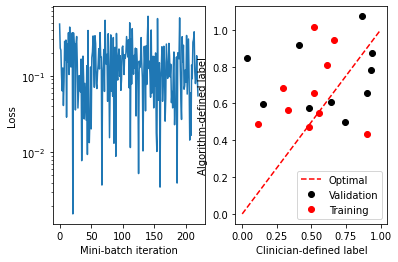

Chunk 22/200: 100%|##########| 10/10 [04:47<00:00, 28.79s/it]


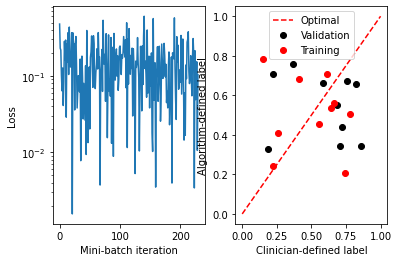

Chunk 23/200: 100%|##########| 10/10 [04:50<00:00, 29.03s/it]


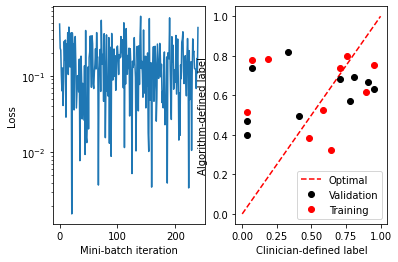

Chunk 24/200: 100%|##########| 10/10 [04:42<00:00, 28.23s/it]


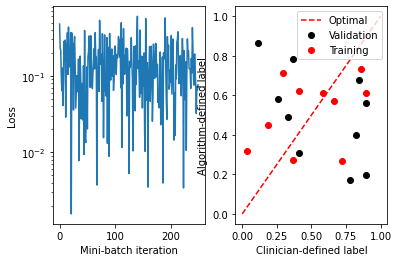

Chunk 25/200: 100%|##########| 10/10 [03:22<00:00, 20.30s/it]


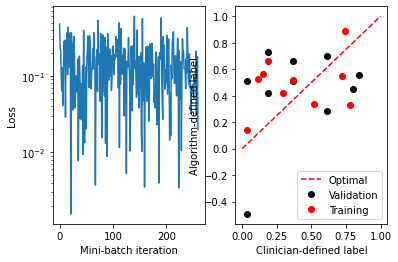

Chunk 26/200: 100%|##########| 10/10 [03:14<00:00, 19.41s/it]


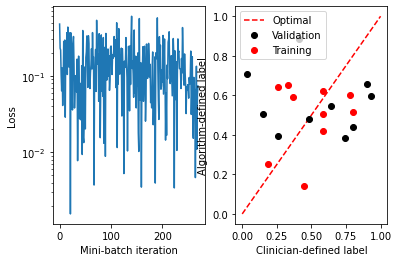

Chunk 27/200: 100%|##########| 10/10 [03:35<00:00, 21.54s/it]


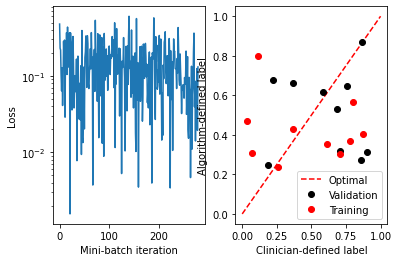

Chunk 28/200: 100%|##########| 10/10 [03:27<00:00, 20.75s/it]


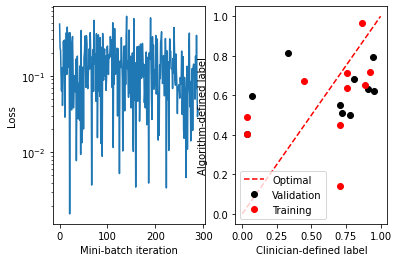

Chunk 29/200: 100%|##########| 10/10 [03:37<00:00, 21.78s/it]


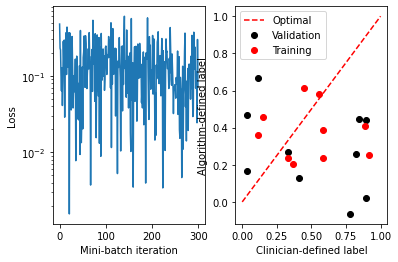

Chunk 30/200: 100%|##########| 10/10 [03:40<00:00, 22.07s/it]


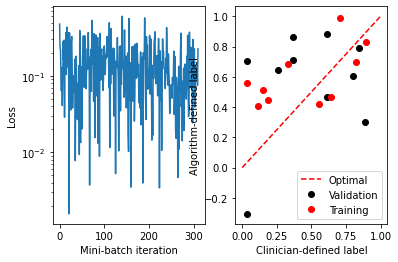

Chunk 31/200: 100%|##########| 10/10 [03:36<00:00, 21.68s/it]


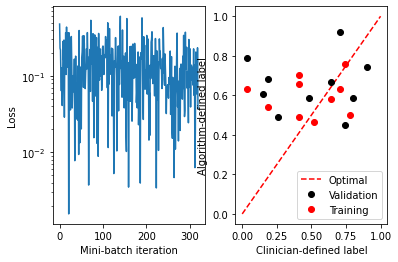

Chunk 32/200: 100%|##########| 10/10 [03:37<00:00, 21.79s/it]


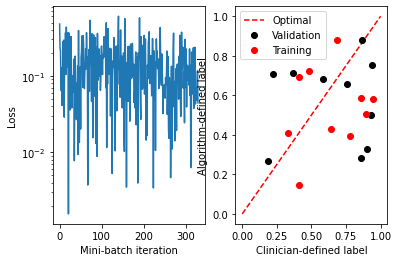

Chunk 33/200: 100%|##########| 10/10 [03:33<00:00, 21.35s/it]


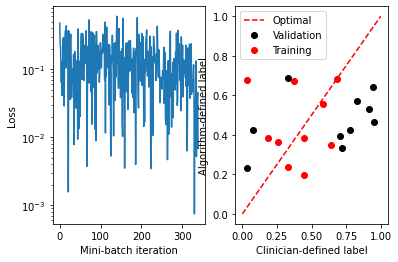

Chunk 34/200: 100%|##########| 10/10 [03:31<00:00, 21.12s/it]


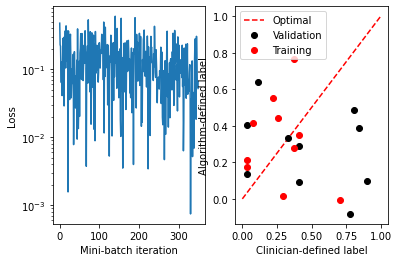

Chunk 35/200: 100%|##########| 10/10 [03:32<00:00, 21.26s/it]


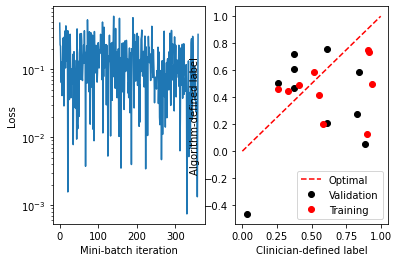

Chunk 36/200: 100%|##########| 10/10 [03:29<00:00, 20.91s/it]


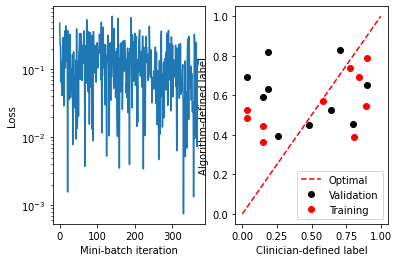

Chunk 37/200: 100%|##########| 10/10 [03:34<00:00, 21.49s/it]


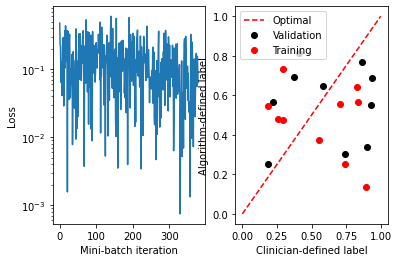

Chunk 38/200: 100%|##########| 10/10 [03:37<00:00, 21.72s/it]


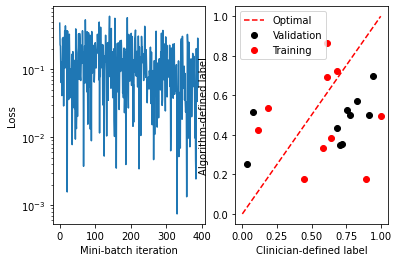

Chunk 39/200: 100%|##########| 10/10 [03:34<00:00, 21.41s/it]


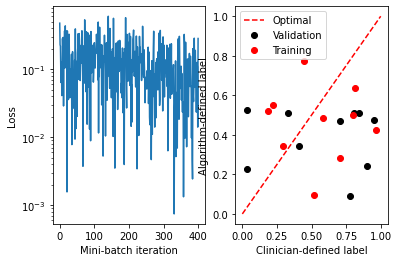

Chunk 40/200: 100%|##########| 10/10 [03:33<00:00, 21.40s/it]


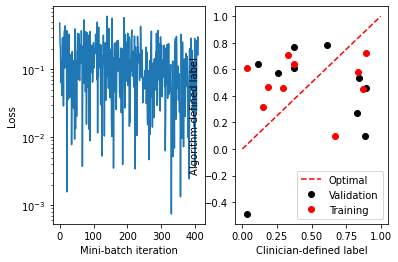

Chunk 41/200: 100%|##########| 10/10 [03:37<00:00, 21.70s/it]


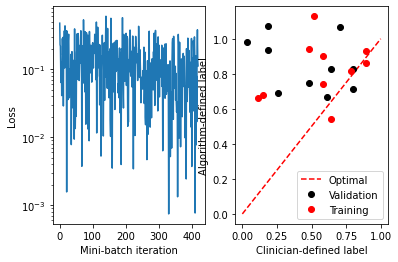

Chunk 42/200: 100%|##########| 10/10 [03:32<00:00, 21.28s/it]


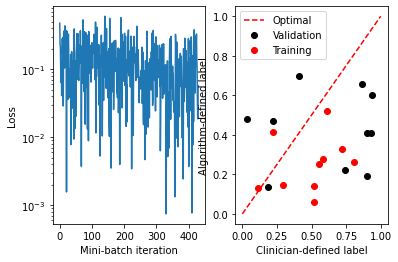

Chunk 43/200: 100%|##########| 10/10 [03:30<00:00, 21.05s/it]


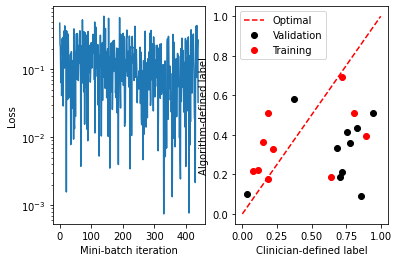

Chunk 44/200: 100%|##########| 10/10 [03:30<00:00, 21.05s/it]


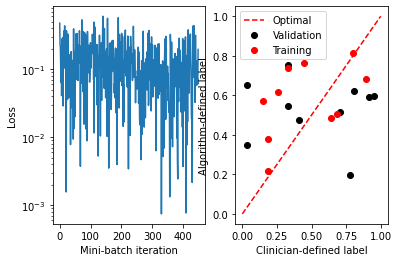

Chunk 45/200: 100%|##########| 10/10 [03:36<00:00, 21.65s/it]


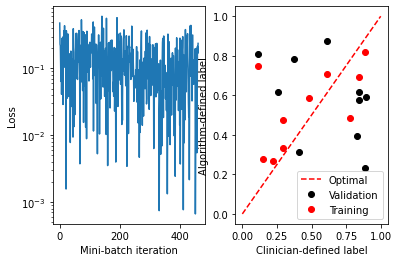

Chunk 46/200: 100%|##########| 10/10 [03:39<00:00, 21.95s/it]


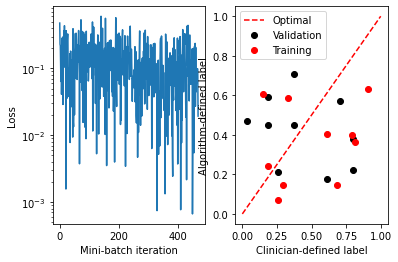

Chunk 47/200: 100%|##########| 10/10 [03:30<00:00, 21.09s/it]


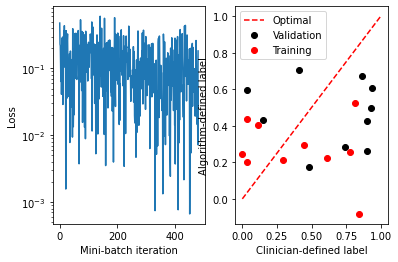

Chunk 48/200: 100%|##########| 10/10 [03:31<00:00, 21.19s/it]


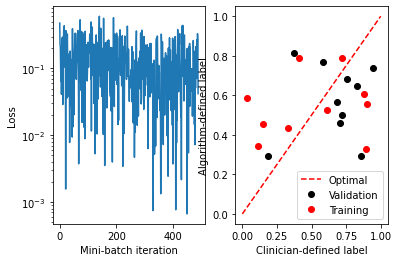

Chunk 49/200: 100%|##########| 10/10 [03:32<00:00, 21.25s/it]


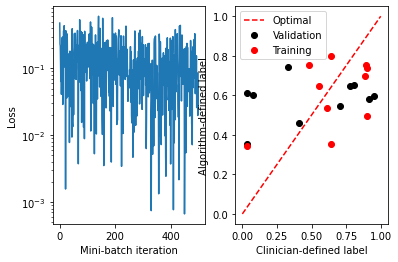

Chunk 50/200: 100%|##########| 10/10 [03:39<00:00, 21.99s/it]


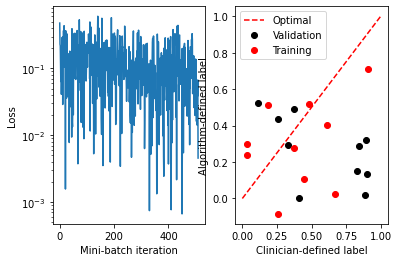

Chunk 51/200: 100%|##########| 10/10 [03:38<00:00, 21.88s/it]


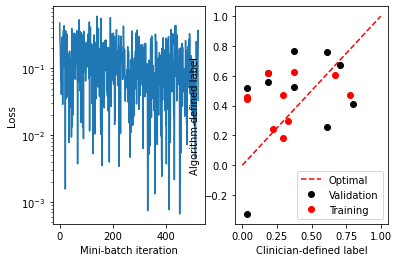

Chunk 52/200: 100%|##########| 10/10 [03:31<00:00, 21.16s/it]


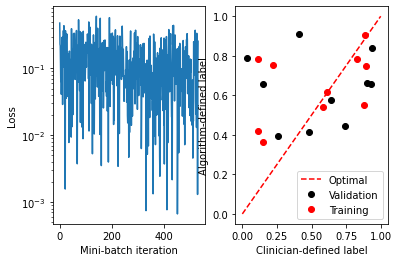

Chunk 53/200: 100%|##########| 10/10 [03:03<00:00, 18.32s/it]


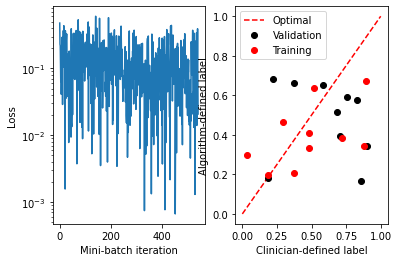

Chunk 54/200: 100%|##########| 10/10 [03:01<00:00, 18.15s/it]


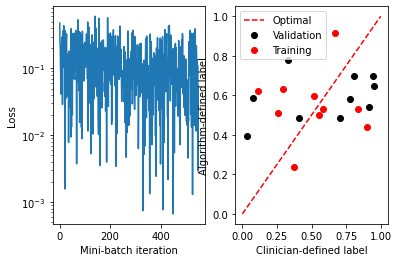

Chunk 55/200: 100%|##########| 10/10 [03:01<00:00, 18.12s/it]


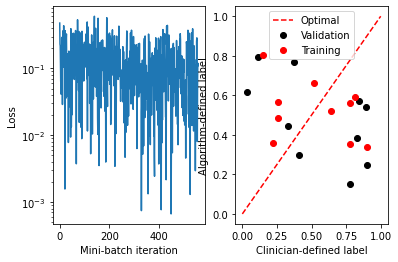

Chunk 56/200: 100%|##########| 10/10 [03:01<00:00, 18.13s/it]


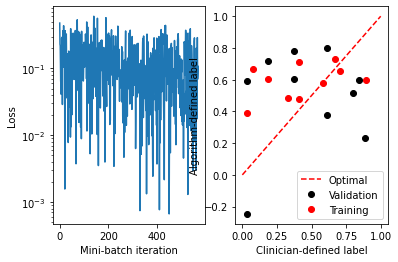

Chunk 57/200: 100%|##########| 10/10 [03:01<00:00, 18.14s/it]


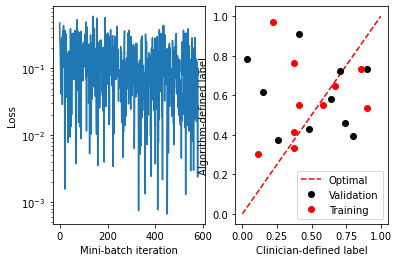

Chunk 58/200: 100%|##########| 10/10 [04:39<00:00, 27.96s/it]


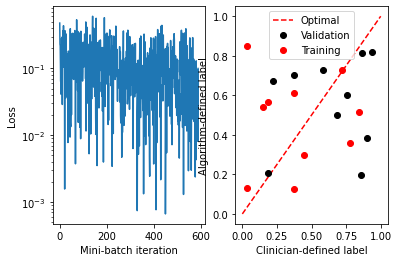

Chunk 59/200: 100%|##########| 10/10 [04:59<00:00, 29.98s/it]


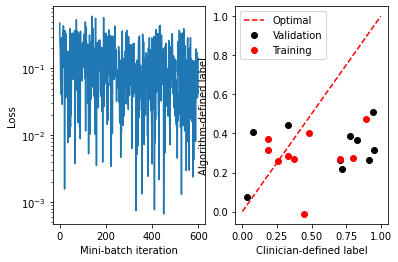

Chunk 60/200: 100%|##########| 10/10 [04:54<00:00, 29.46s/it]


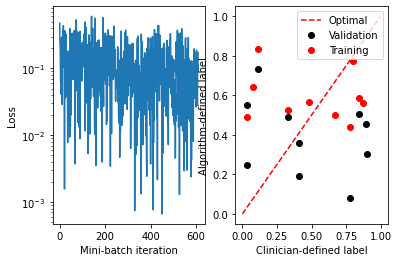

Chunk 61/200: 100%|##########| 10/10 [04:46<00:00, 28.63s/it]


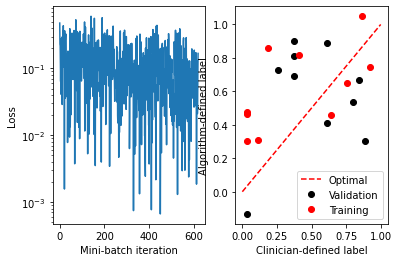

Chunk 62/200: 100%|##########| 10/10 [04:41<00:00, 28.14s/it]


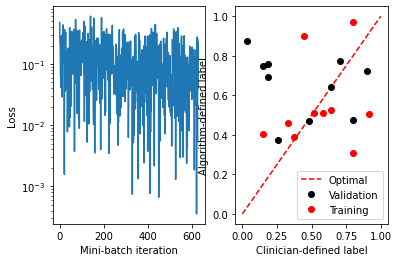

Chunk 63/200: 100%|##########| 10/10 [04:41<00:00, 28.16s/it]


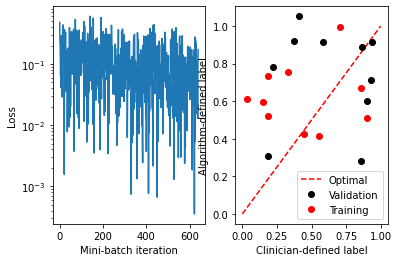

Chunk 64/200: 100%|##########| 10/10 [04:42<00:00, 28.26s/it]


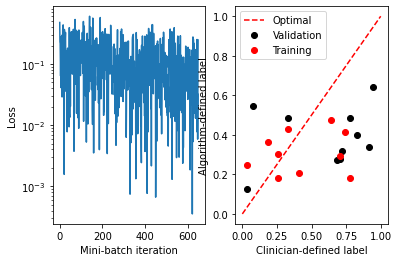

Chunk 65/200: 100%|##########| 10/10 [04:40<00:00, 28.01s/it]


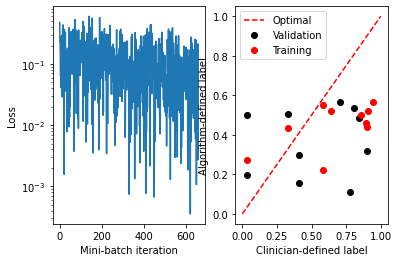

Chunk 66/200: 100%|##########| 10/10 [04:42<00:00, 28.21s/it]


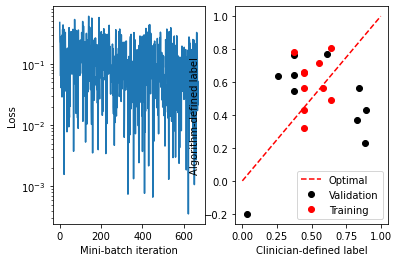

Chunk 67/200: 100%|##########| 10/10 [04:45<00:00, 28.56s/it]


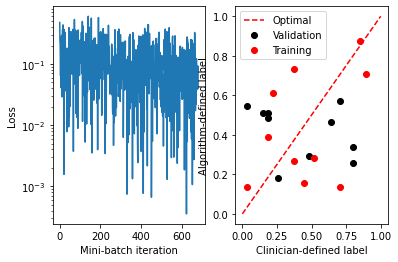

Chunk 68/200: 100%|##########| 10/10 [04:40<00:00, 28.04s/it]


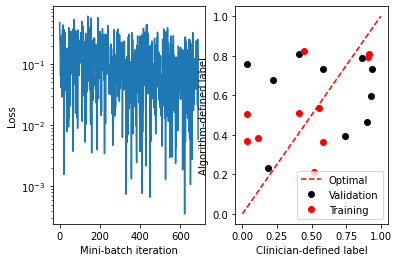

Chunk 69/200: 100%|##########| 10/10 [04:42<00:00, 28.26s/it]


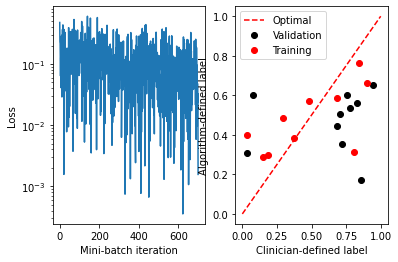

Chunk 70/200: 100%|##########| 10/10 [04:43<00:00, 28.31s/it]


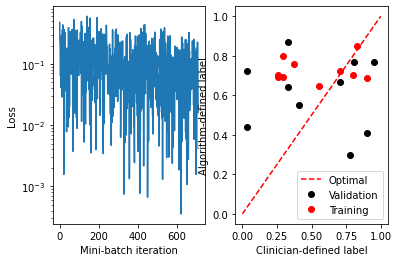

Chunk 71/200: 100%|##########| 10/10 [04:38<00:00, 27.87s/it]


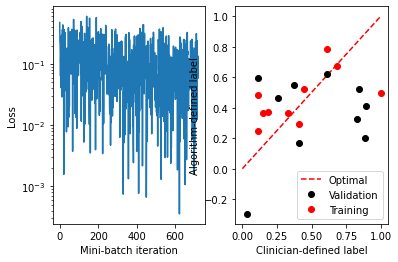

Chunk 72/200: 100%|##########| 10/10 [04:43<00:00, 28.38s/it]


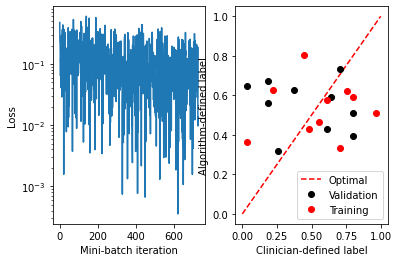

Chunk 73/200: 100%|##########| 10/10 [04:43<00:00, 28.32s/it]


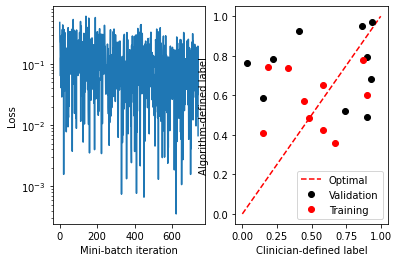

Chunk 74/200: 100%|##########| 10/10 [04:39<00:00, 27.92s/it]


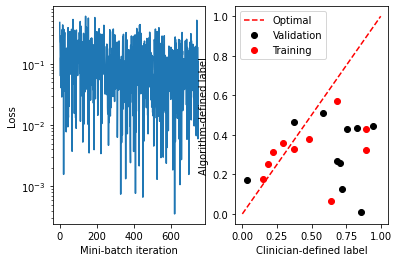

Chunk 75/200: 100%|##########| 10/10 [04:40<00:00, 28.02s/it]


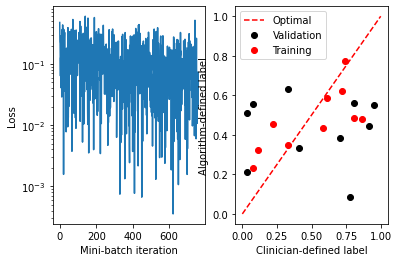

Chunk 76/200: 100%|##########| 10/10 [04:42<00:00, 28.30s/it]


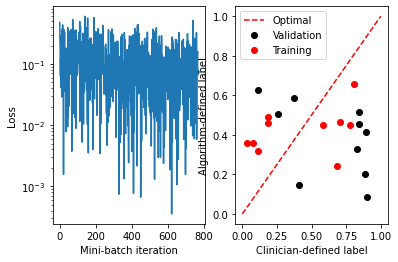

Chunk 77/200: 100%|##########| 10/10 [04:47<00:00, 28.74s/it]


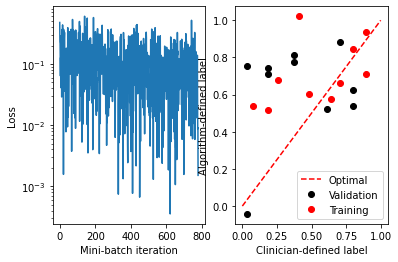

Chunk 78/200: 100%|##########| 10/10 [04:47<00:00, 28.73s/it]


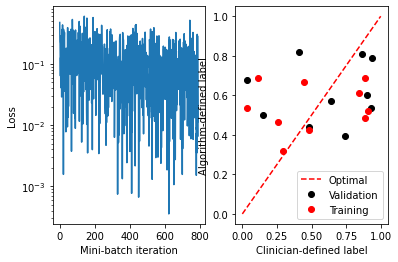

Chunk 79/200: 100%|##########| 10/10 [04:40<00:00, 28.09s/it]


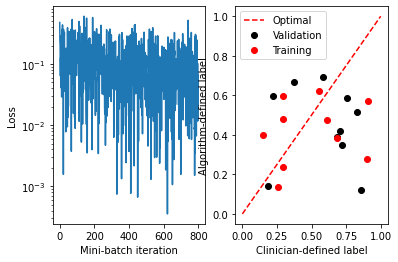

Chunk 80/200: 100%|##########| 10/10 [04:39<00:00, 27.96s/it]


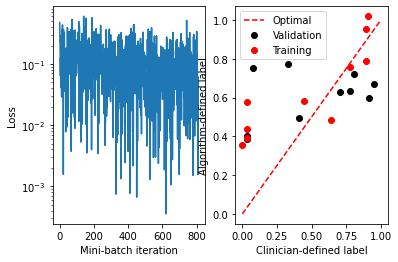

Chunk 81/200: 100%|##########| 10/10 [04:40<00:00, 28.01s/it]


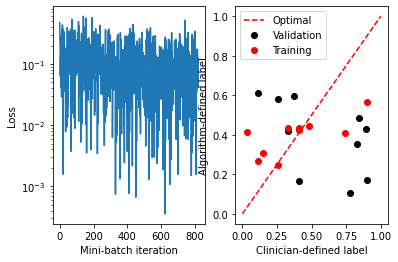

Chunk 82/200: 100%|##########| 10/10 [04:42<00:00, 28.25s/it]


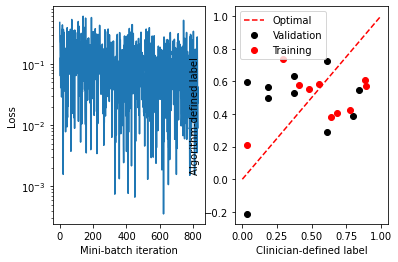

Chunk 83/200: 100%|##########| 10/10 [04:40<00:00, 28.04s/it]


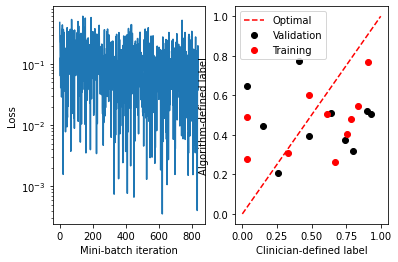

Chunk 84/200: 100%|##########| 10/10 [04:41<00:00, 28.18s/it]


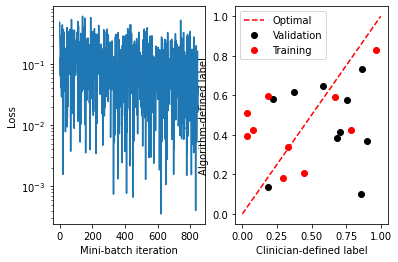

Chunk 85/200: 100%|##########| 10/10 [04:41<00:00, 28.13s/it]


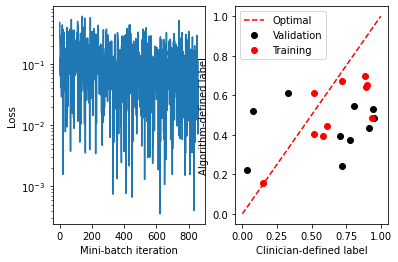

Chunk 86/200: 100%|##########| 10/10 [04:44<00:00, 28.44s/it]


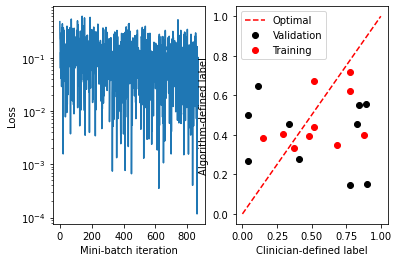

Chunk 87/200: 100%|##########| 10/10 [04:48<00:00, 28.90s/it]


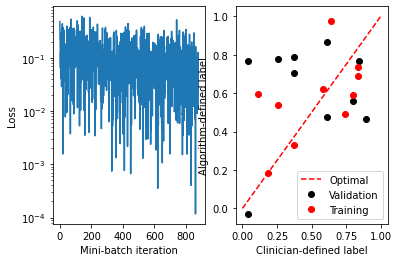

Chunk 88/200: 100%|##########| 10/10 [04:47<00:00, 28.77s/it]


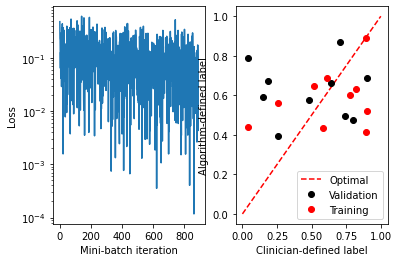

Chunk 89/200: 100%|##########| 10/10 [04:38<00:00, 27.86s/it]


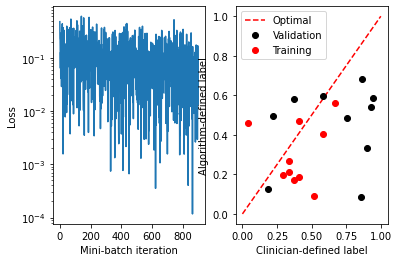

Chunk 90/200: 100%|##########| 10/10 [04:39<00:00, 27.99s/it]


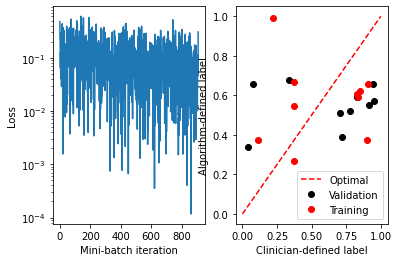

Chunk 91/200: 100%|##########| 10/10 [04:35<00:00, 27.58s/it]


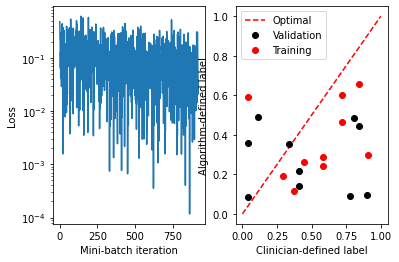

Chunk 92/200: 100%|##########| 10/10 [04:41<00:00, 28.11s/it]


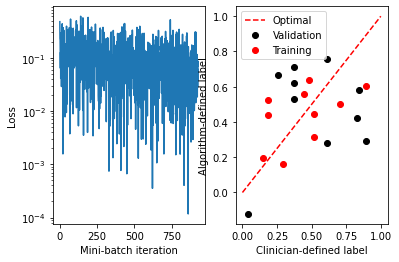

Chunk 93/200: 100%|##########| 10/10 [04:41<00:00, 28.17s/it]


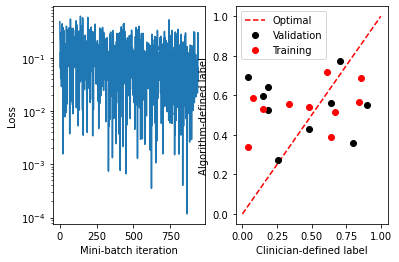

Chunk 94/200: 100%|##########| 10/10 [04:42<00:00, 28.21s/it]


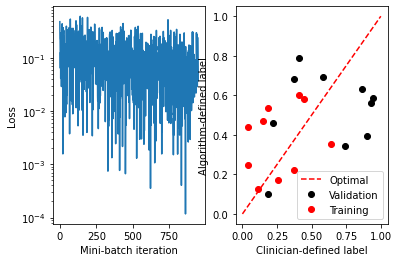

Chunk 95/200: 100%|##########| 10/10 [04:45<00:00, 28.56s/it]


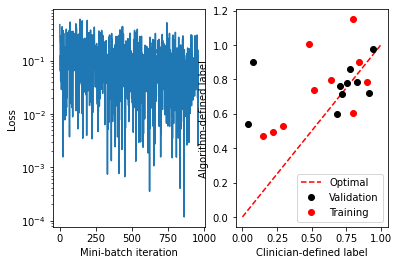

Chunk 96/200: 100%|##########| 10/10 [04:39<00:00, 27.93s/it]


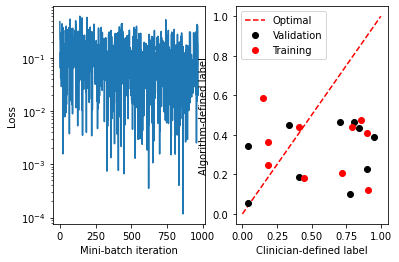

Chunk 97/200: 100%|##########| 10/10 [04:50<00:00, 29.03s/it]


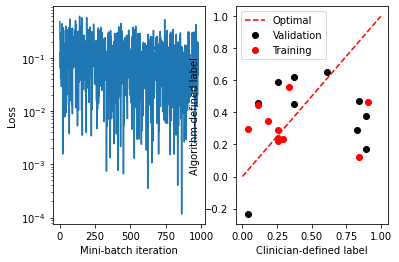

Chunk 98/200: 100%|##########| 10/10 [04:49<00:00, 28.91s/it]


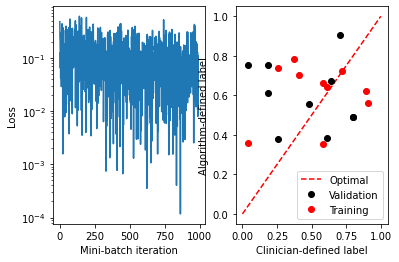

Chunk 99/200: 100%|##########| 10/10 [04:42<00:00, 28.29s/it]


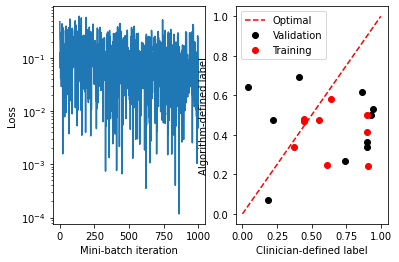

Chunk 100/200: 100%|##########| 10/10 [04:45<00:00, 28.52s/it]


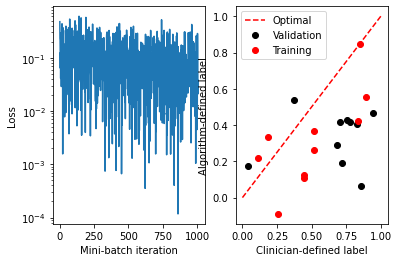

Chunk 101/200: 100%|##########| 10/10 [04:44<00:00, 28.48s/it]


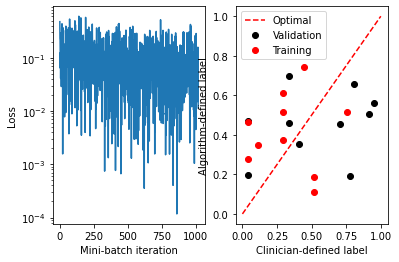

Chunk 102/200: 100%|##########| 10/10 [04:46<00:00, 28.64s/it]


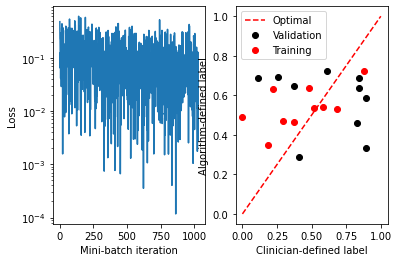

Chunk 103/200: 100%|##########| 10/10 [04:46<00:00, 28.63s/it]


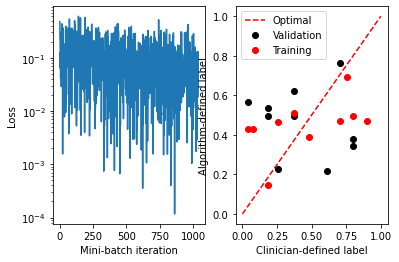

Chunk 104/200: 100%|##########| 10/10 [04:47<00:00, 28.71s/it]


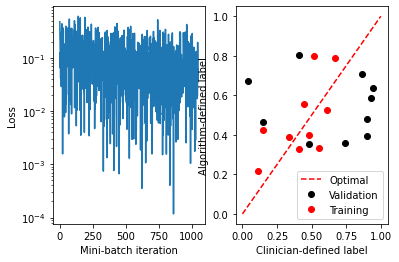

Chunk 105/200: 100%|##########| 10/10 [04:45<00:00, 28.53s/it]


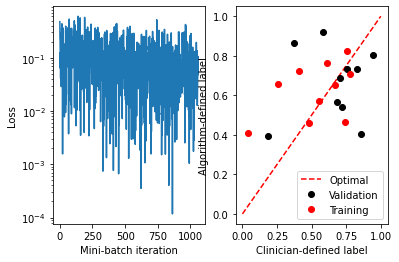

Chunk 106/200: 100%|##########| 10/10 [04:46<00:00, 28.67s/it]


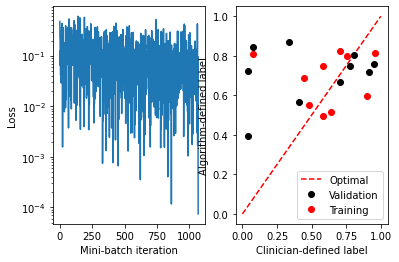

Chunk 107/200: 100%|##########| 10/10 [04:43<00:00, 28.39s/it]


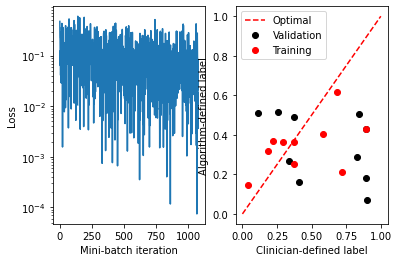

Chunk 108/200: 100%|##########| 10/10 [04:47<00:00, 28.70s/it]


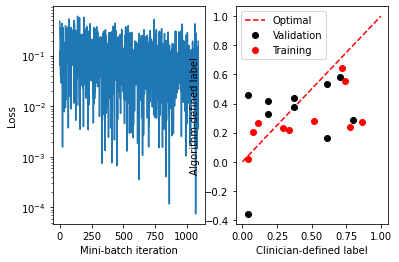

Chunk 109/200: 100%|##########| 10/10 [04:49<00:00, 28.90s/it]


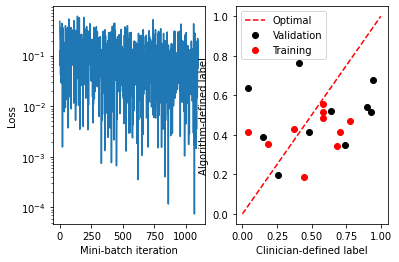

Chunk 110/200: 100%|##########| 10/10 [04:54<00:00, 29.47s/it]


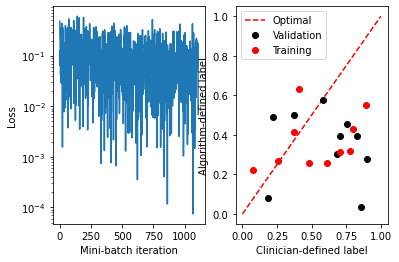

Chunk 111/200: 100%|##########| 10/10 [04:52<00:00, 29.28s/it]


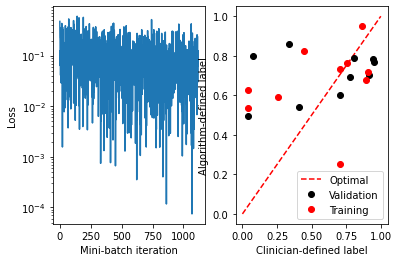

Chunk 112/200: 100%|##########| 10/10 [04:53<00:00, 29.31s/it]


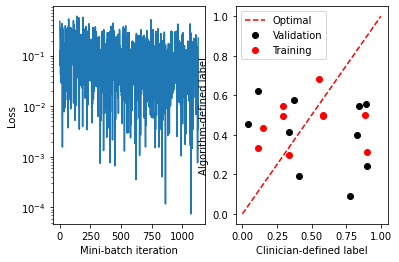

Chunk 113/200: 100%|##########| 10/10 [04:48<00:00, 28.88s/it]


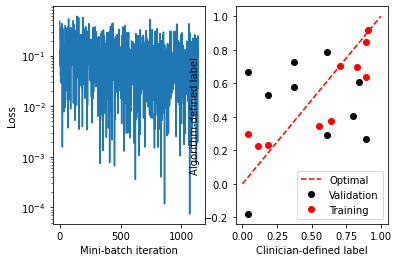

Chunk 114/200: 100%|##########| 10/10 [04:50<00:00, 29.08s/it]


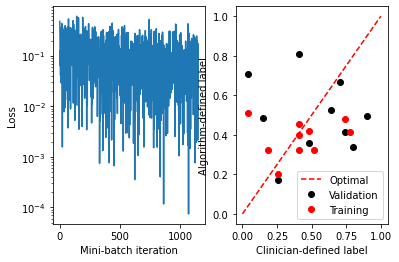

Chunk 115/200: 100%|##########| 10/10 [04:49<00:00, 28.96s/it]


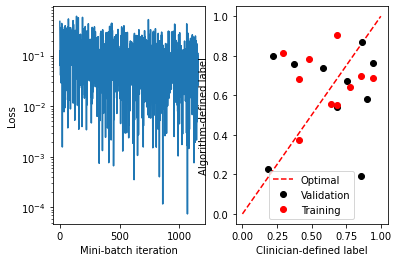

Chunk 116/200: 100%|##########| 10/10 [04:48<00:00, 28.89s/it]


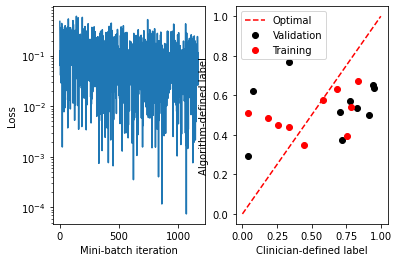

Chunk 117/200: 100%|##########| 10/10 [04:44<00:00, 28.50s/it]


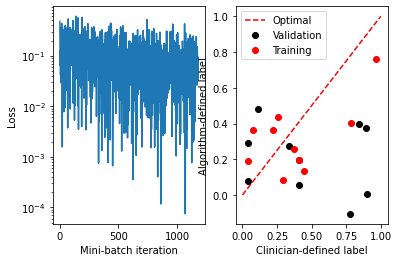

Chunk 118/200: 100%|##########| 10/10 [04:46<00:00, 28.68s/it]


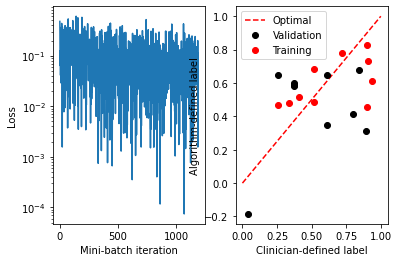

Chunk 119/200: 100%|##########| 10/10 [04:46<00:00, 28.66s/it]


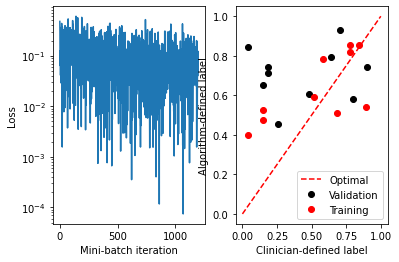

Chunk 120/200: 100%|##########| 10/10 [04:45<00:00, 28.57s/it]


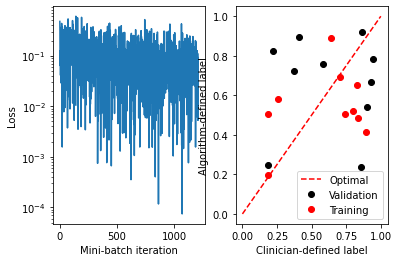

Chunk 121/200: 100%|##########| 10/10 [04:47<00:00, 28.75s/it]


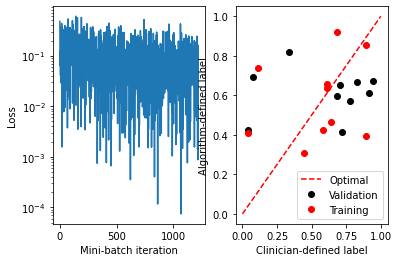

Chunk 122/200: 100%|##########| 10/10 [04:47<00:00, 28.79s/it]


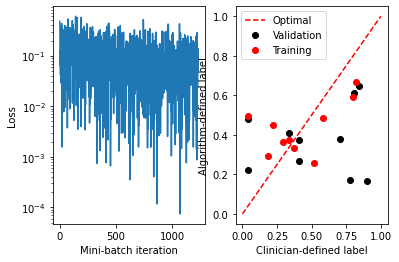

Chunk 123/200: 100%|##########| 10/10 [04:46<00:00, 28.69s/it]


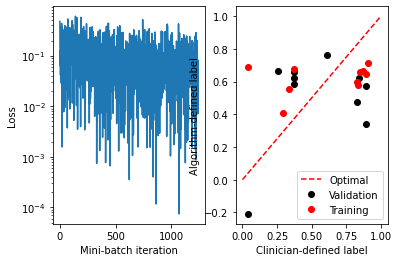

Chunk 124/200: 100%|##########| 10/10 [04:49<00:00, 28.96s/it]


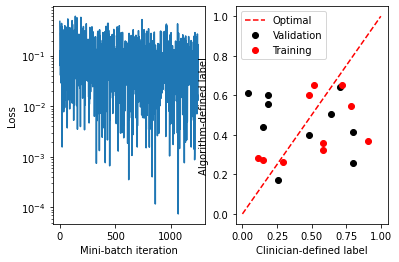

Chunk 125/200: 100%|##########| 10/10 [04:46<00:00, 28.66s/it]


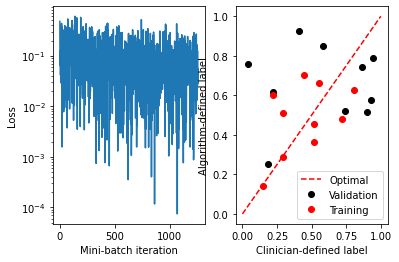

Chunk 126/200: 100%|##########| 10/10 [04:46<00:00, 28.70s/it]


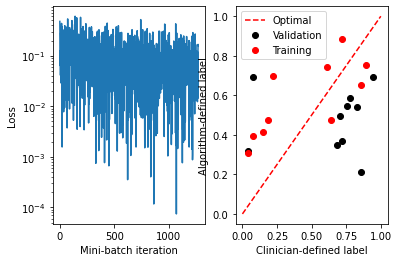

Chunk 127/200: 100%|##########| 10/10 [04:49<00:00, 28.91s/it]


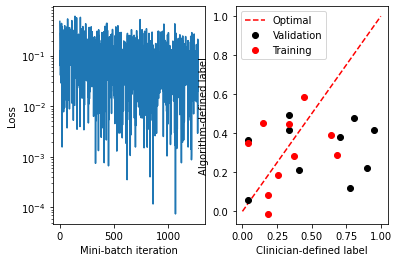

Chunk 128/200: 100%|##########| 10/10 [04:49<00:00, 28.96s/it]


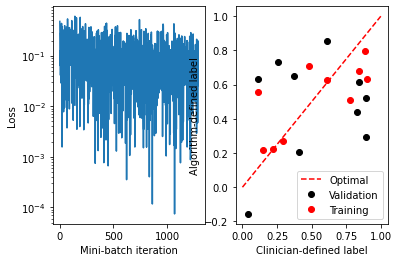

Chunk 129/200: 100%|##########| 10/10 [04:50<00:00, 29.08s/it]


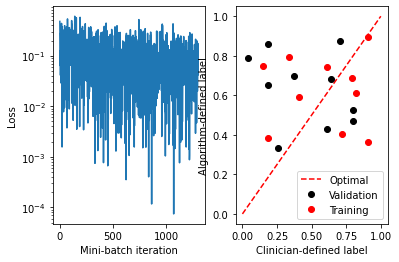

Chunk 130/200: 100%|##########| 10/10 [04:45<00:00, 28.52s/it]


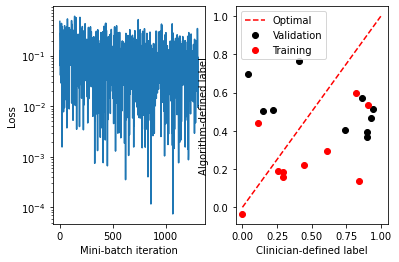

Chunk 131/200: 100%|##########| 10/10 [04:49<00:00, 28.93s/it]


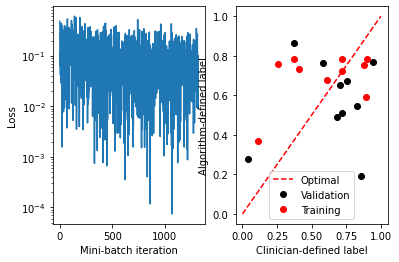

Chunk 132/200: 100%|##########| 10/10 [04:42<00:00, 28.29s/it]


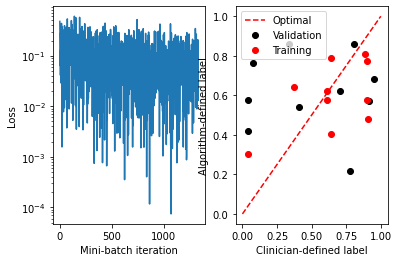

Chunk 133/200: 100%|##########| 10/10 [04:47<00:00, 28.78s/it]


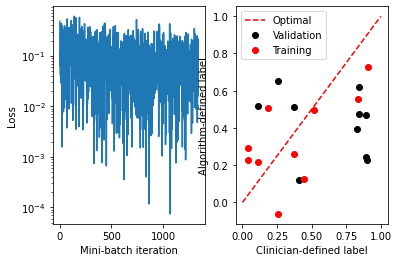

Chunk 134/200: 100%|##########| 10/10 [04:48<00:00, 28.87s/it]


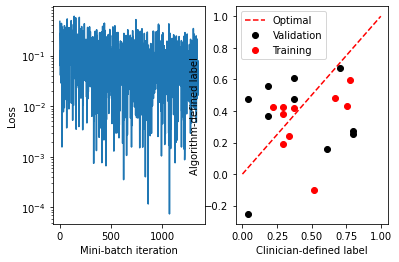

Chunk 135/200: 100%|##########| 10/10 [04:48<00:00, 28.83s/it]


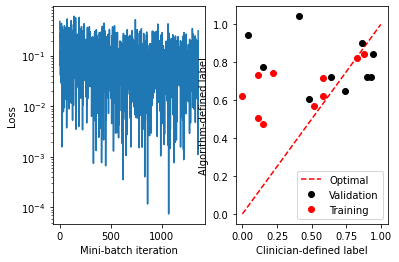

Chunk 136/200: 100%|##########| 10/10 [04:47<00:00, 28.78s/it]


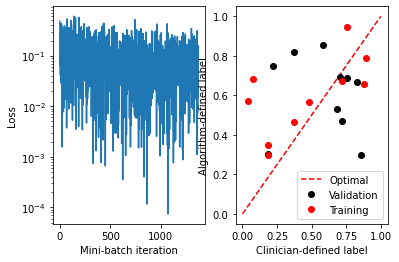

Chunk 137/200: 100%|##########| 10/10 [04:48<00:00, 28.87s/it]


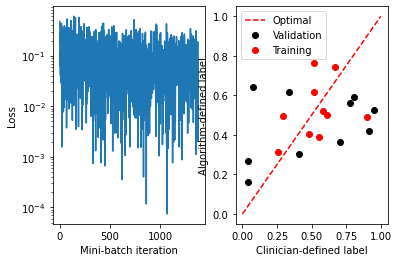

Chunk 138/200: 100%|##########| 10/10 [04:50<00:00, 29.06s/it]


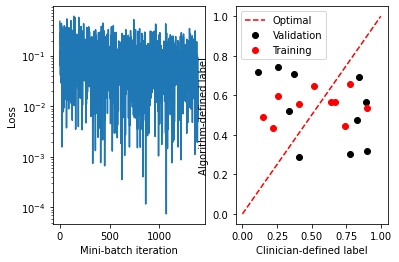

Chunk 139/200: 100%|##########| 10/10 [04:55<00:00, 29.50s/it]


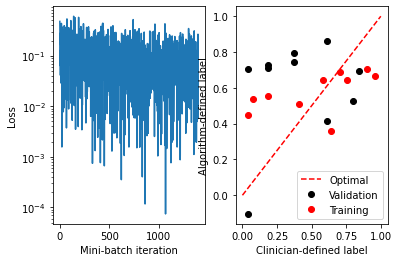

Chunk 140/200: 100%|##########| 10/10 [04:49<00:00, 28.95s/it]


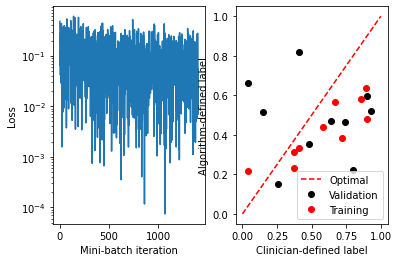

Chunk 141/200: 100%|##########| 10/10 [04:42<00:00, 28.23s/it]


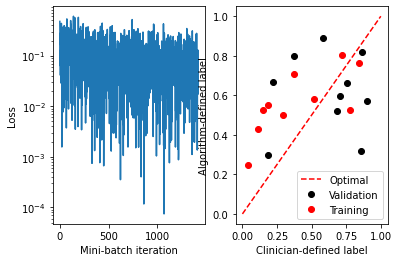

Chunk 142/200: 100%|##########| 10/10 [04:48<00:00, 28.80s/it]


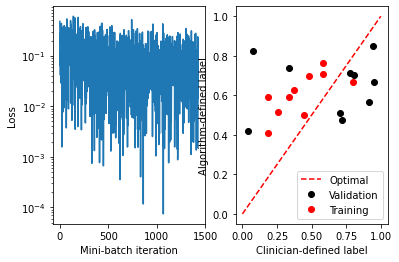

Chunk 143/200: 100%|##########| 10/10 [04:48<00:00, 28.86s/it]


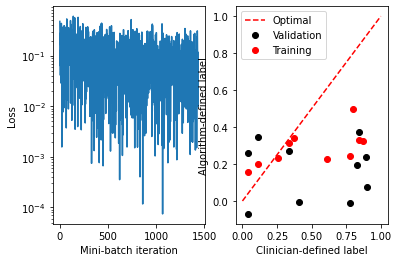

Chunk 144/200: 100%|##########| 10/10 [04:46<00:00, 28.69s/it]


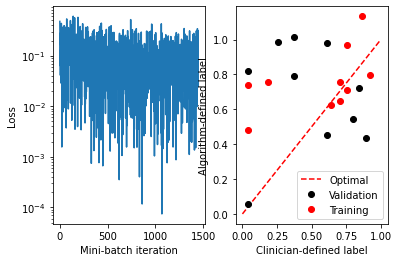

Chunk 145/200: 100%|##########| 10/10 [04:40<00:00, 28.07s/it]


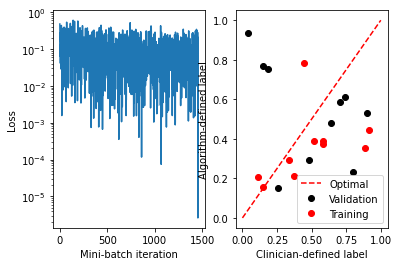

Chunk 146/200: 100%|##########| 10/10 [04:43<00:00, 28.37s/it]


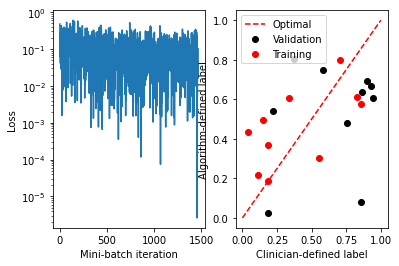

Chunk 147/200: 100%|##########| 10/10 [04:42<00:00, 28.28s/it]


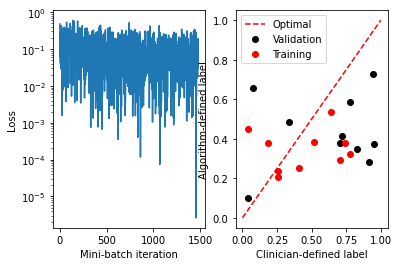

Chunk 148/200: 100%|##########| 10/10 [04:50<00:00, 29.01s/it]


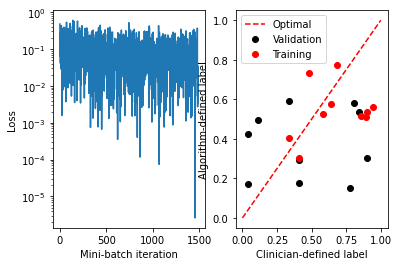

Chunk 149/200: 100%|##########| 10/10 [04:46<00:00, 28.62s/it]


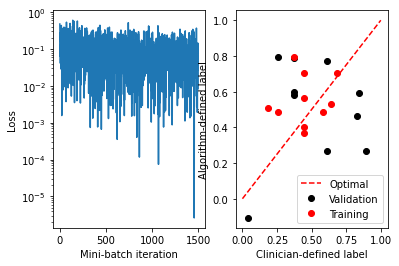

Chunk 150/200: 100%|##########| 10/10 [04:46<00:00, 28.64s/it]


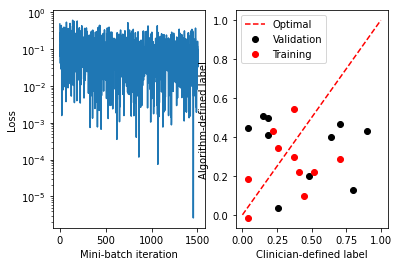

Chunk 151/200: 100%|##########| 10/10 [04:50<00:00, 29.06s/it]


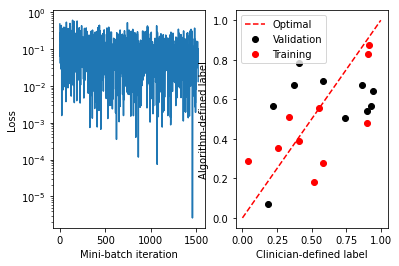

Chunk 152/200: 100%|##########| 10/10 [04:50<00:00, 29.05s/it]


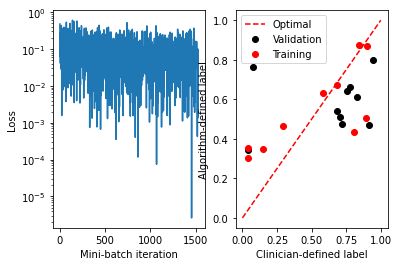

Chunk 153/200: 100%|##########| 10/10 [04:50<00:00, 29.06s/it]


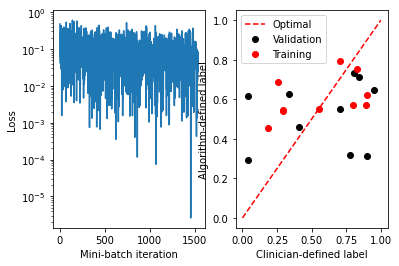

Chunk 154/200: 100%|##########| 10/10 [04:49<00:00, 28.98s/it]


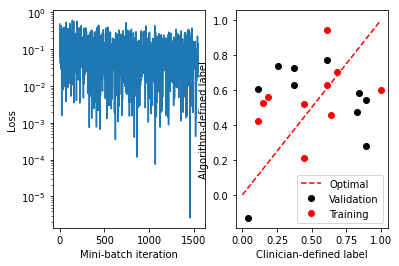

Chunk 155/200: 100%|##########| 10/10 [04:44<00:00, 28.41s/it]


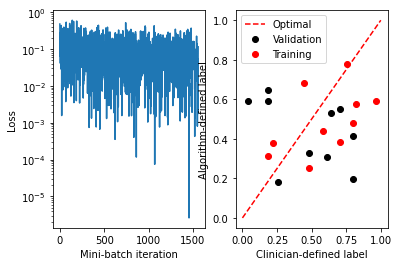

Chunk 156/200: 100%|##########| 10/10 [04:43<00:00, 28.33s/it]


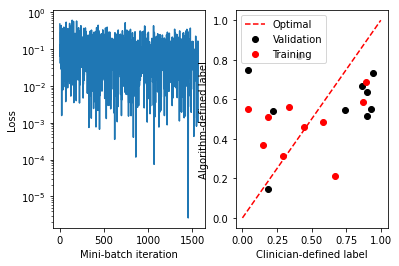

Chunk 157/200: 100%|##########| 10/10 [04:47<00:00, 28.74s/it]


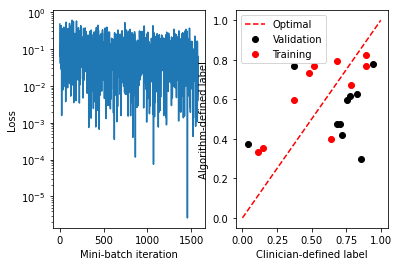

Chunk 158/200: 100%|##########| 10/10 [04:47<00:00, 28.78s/it]


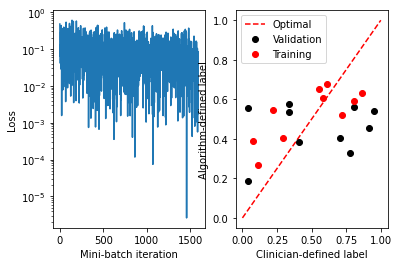

Chunk 159/200: 100%|##########| 10/10 [04:47<00:00, 28.80s/it]


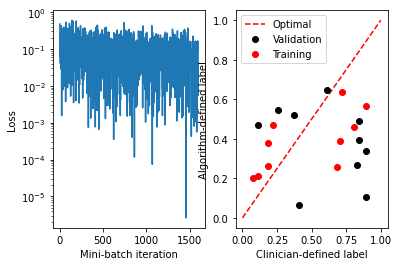

Chunk 160/200: 100%|##########| 10/10 [04:48<00:00, 28.82s/it]


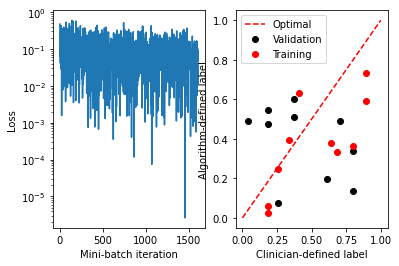

Chunk 161/200: 100%|##########| 10/10 [04:46<00:00, 28.65s/it]


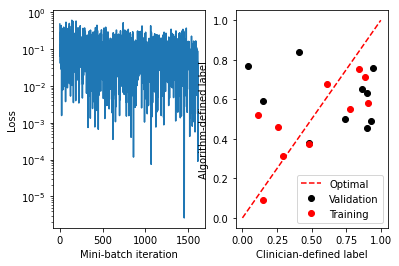

Chunk 162/200: 100%|##########| 10/10 [04:46<00:00, 28.62s/it]


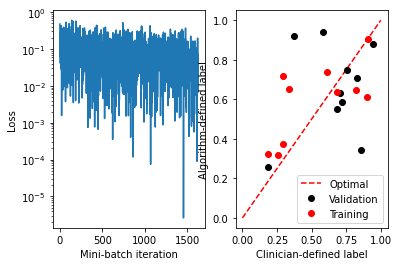

Chunk 163/200: 100%|##########| 10/10 [04:46<00:00, 28.68s/it]


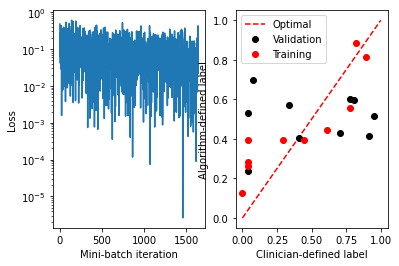

Chunk 164/200: 100%|##########| 10/10 [04:47<00:00, 28.73s/it]


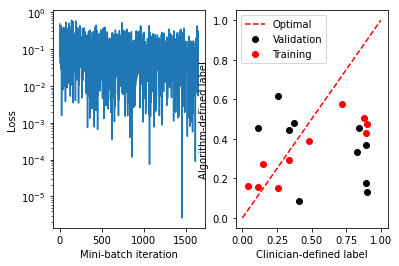

Chunk 165/200: 100%|##########| 10/10 [04:53<00:00, 29.35s/it]


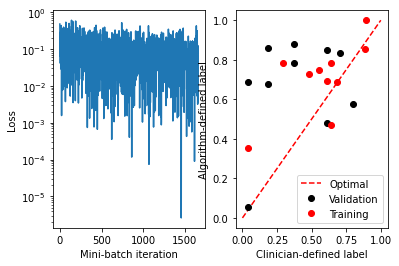

Chunk 166/200: 100%|##########| 10/10 [04:55<00:00, 29.55s/it]


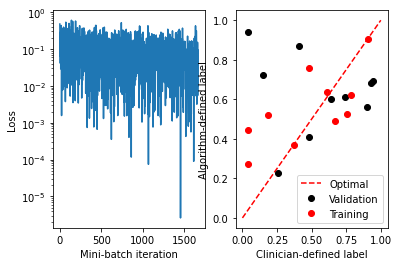

Chunk 167/200: 100%|##########| 10/10 [03:10<00:00, 19.03s/it]


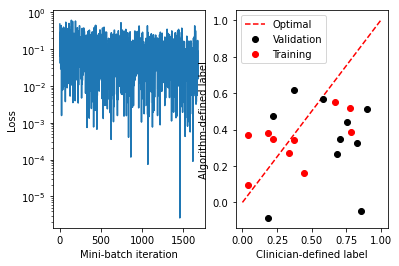

Chunk 168/200: 100%|##########| 10/10 [03:15<00:00, 19.57s/it]


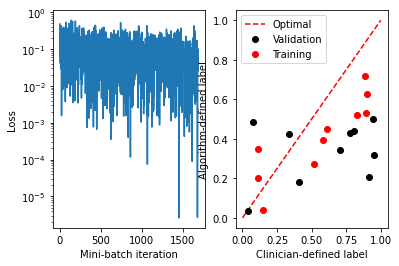

Chunk 169/200: 100%|##########| 10/10 [03:31<00:00, 21.18s/it]


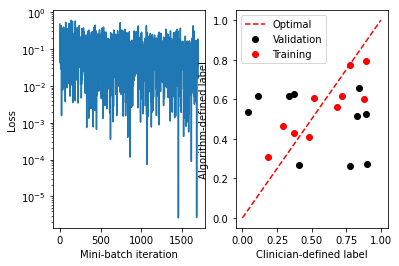

Chunk 170/200: 100%|##########| 10/10 [03:35<00:00, 21.56s/it]


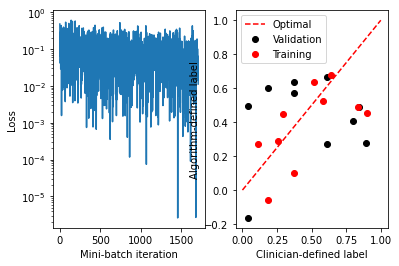

Chunk 171/200: 100%|##########| 10/10 [03:32<00:00, 21.21s/it]


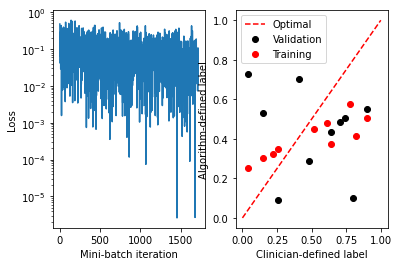

Chunk 172/200: 100%|##########| 10/10 [03:32<00:00, 21.24s/it]


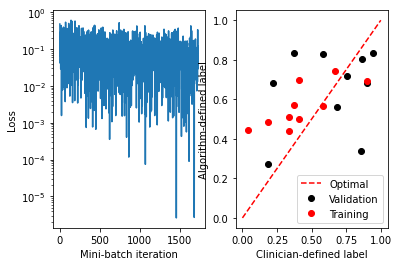

Chunk 173/200: 100%|##########| 10/10 [03:34<00:00, 21.46s/it]


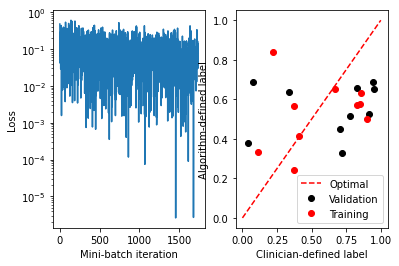

Chunk 174/200: 100%|##########| 10/10 [03:30<00:00, 21.05s/it]


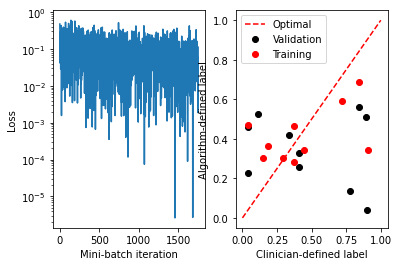

Chunk 175/200: 100%|##########| 10/10 [03:24<00:00, 20.43s/it]


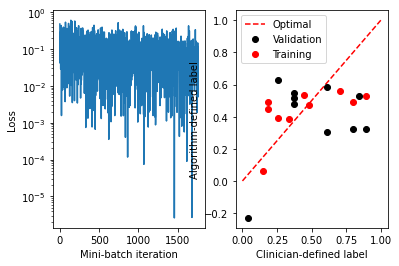

Chunk 176/200: 100%|##########| 10/10 [03:11<00:00, 19.13s/it]


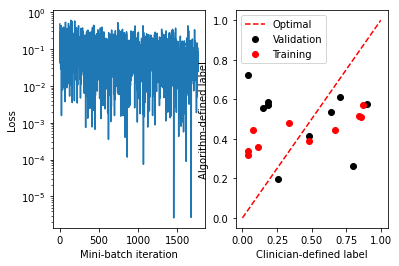

Chunk 177/200: 100%|##########| 10/10 [03:28<00:00, 20.80s/it]


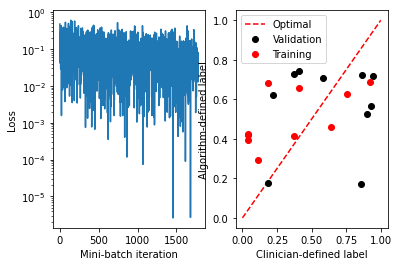

Chunk 178/200: 100%|##########| 10/10 [03:35<00:00, 21.56s/it]


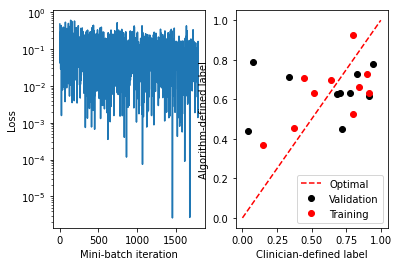

Chunk 179/200: 100%|##########| 10/10 [03:32<00:00, 21.25s/it]


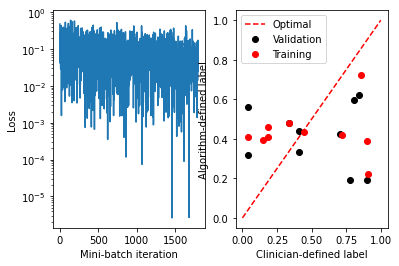

Chunk 180/200: 100%|##########| 10/10 [03:37<00:00, 21.74s/it]


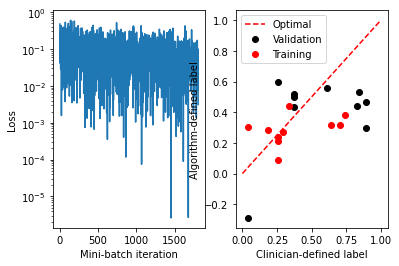

Chunk 181/200: 100%|##########| 10/10 [03:26<00:00, 20.63s/it]


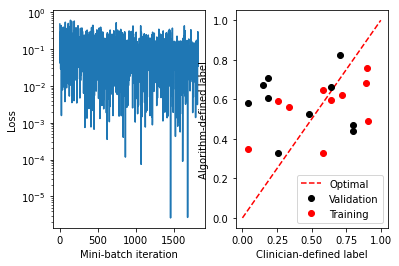

Chunk 182/200: 100%|##########| 10/10 [03:28<00:00, 20.87s/it]


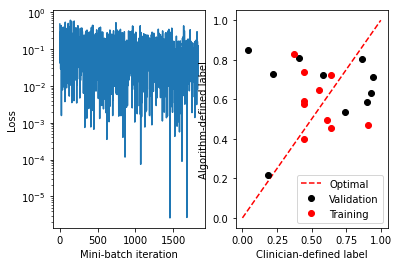

Chunk 183/200: 100%|##########| 10/10 [03:34<00:00, 21.44s/it]


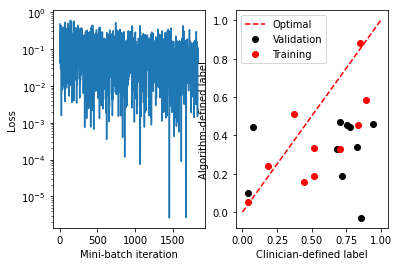

Chunk 184/200: 100%|##########| 10/10 [03:33<00:00, 21.31s/it]


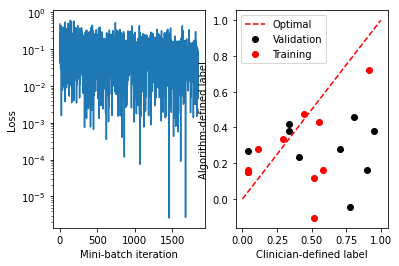

Chunk 185/200: 100%|##########| 10/10 [03:29<00:00, 20.92s/it]


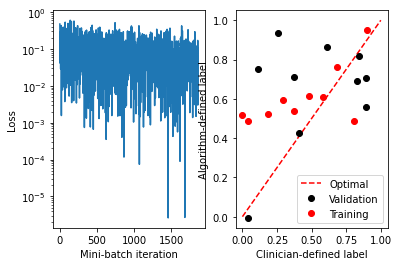

Chunk 186/200:  30%|###       | 3/10 [01:04<02:30, 21.45s/it]

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-5)
@tf.function 
def train_step (batch, label):
    with tf.GradientTape() as tape:
        regression_loss = tf.reduce_mean(tf.square(regression_model (common_model(batch))[:,0] - label[:,0]))
    
    trainables = common_model.trainable_weights + regression_model.trainable_weights
    grads_common = tape.gradient(regression_loss, trainables)
    optimizer.apply_gradients(zip(grads_common, trainables))
    return regression_loss

from sklearn.preprocessing import QuantileTransformer
def scaler (x):
    qt = QuantileTransformer()
    raw = qt.fit_transform ( x.reshape((-1,1))).reshape(x.shape)
    return 1/(1+np.exp(-(raw-0.7)/0.2))

    
def get_chunk (iterator, chunk_size, fast = False):
    data_chunk = []
    labels     = []
    for iElement, (element, label) in enumerate(iterator):
        if iElement >= chunk_size:
            break 
        if fast:
            data_chunk.append ( scaler(element)[20:40,::-2,::2] )
        else:    
            data_chunk.append ( scaler(element)[:,::-1,:] )
                
        labels.append ( label.astype(np.float32) )


        
    data_chunk = np.array (data_chunk)
    labels = np.array (labels)
    
    return data_chunk, labels 
    
losses = []
samples_per_chunk = 10
n_chunks = 200
batch_size = 2
chunk_size = 30

from itertools import cycle
from tqdm import trange
iterator = cycle (data_pretraining.as_numpy_iterator())
iterator_v = cycle (data_pretraining_test.as_numpy_iterator())
for iChunk in range(n_chunks):
    data_chunk, labels = get_chunk (iterator, chunk_size)
    data_chunk_v, labels_v = get_chunk (iterator_v, 10)

    labels = label_transformer.transform(np.array(labels).reshape(-1,1))
    labels_v = label_transformer.transform(np.array(labels_v).reshape(-1,1))
    for iSample in trange(samples_per_chunk, ascii=True, desc="Chunk %d/%d"%(iChunk,n_chunks)):
        indices = np.random.randint (0, len(data_chunk), batch_size )

        losses.append(
            train_step (data_chunk[indices], labels[indices]).numpy()
        )
        

    plt.subplot(121)    
    plt.plot(losses)
    plt.xlabel ( "Mini-batch iteration")
    plt.ylabel ( "Loss" )
    plt.yscale('log')
    
    plt.subplot(122)
    yhat   = regression_model(common_model(data_chunk[:10]))[:,0]
    yhat_v = regression_model(common_model(data_chunk_v))[:,0]
    plt.plot ( [0.,1.], [0.,1.], 'r--', label = 'Optimal' )
    plt.plot ( labels_v[:,0], yhat_v, 'ko', label = 'Validation' )
    plt.plot ( labels[:10,0], yhat, 'ro', label = 'Training' )
    plt.legend()
    plt.xlabel ( "Clinician-defined label")
    plt.ylabel ( "Algorithm-defined label")
    plt.show()
    
    